# Analysis for `d2` dataset 
The dataset we are looking at corresponds to the following ligament ensemle - 
- Length scale : $ \sim 0.1 \textrm{mm}$ ($\textrm{Oh} = 10^{-2}$)
- Initial perturbation strength : $\varepsilon \sim 0.08$
- Aspect-ratio, defined with respect to initial ligament width : $\Lambda = 50$

#### Import libraries
We start by loading the required libraries, and set the plotting styles. 

In [1]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

# Required libraries for data arrays, data manipulation, plotting etc
import numpy as np
from useful_functions import *
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (5., 5.)})
sns.set_style("ticks")

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}",r'\boldmath']
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

import warnings
warnings.filterwarnings('ignore')

## Data import 

We import a cleaned dataset corresponding to ligament ensemble `d2`. 

#### Main dataset

In [2]:
data = pd.read_csv("./data/new/paper/big_data.csv")
data.head().transpose()
print("Total number of datapoints over all slices of time is {}".format(data.shape[0]))

,0,1,2,3,4
time,0.0,2.0,4.0,6.0,8.0
diameter,8.48255,8.55245,8.53959,8.52993,8.51909
velocity,NaN,-4.52042e-0,-0.00020176,-0.00058563,-0.00062773


Total number of datapoints over all slices of time is 1152816


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152816 entries, 0 to 1152815
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   time      1152771 non-null  float64
 1   diameter  1152732 non-null  float64
 2   velocity  1142778 non-null  object 
dtypes: float64(2), object(1)
memory usage: 26.4+ MB


#### Drop count as function of time
We also have the total drop count as a function of time. 

In [4]:
ndrops = pd.read_csv("./data/new/paper/ndrops_big.csv")
ndrops.head(16).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
time,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30
drops,9981,9977,9973,9978,12275,48382,117226,138561,123795,112364,105033,98277,93882,90821,87294,84115


### Breakups vs Coalescence as function of time
Let us look at how the total number of drops vary versus time. This gives us an idea about the point beyond which no more breakups occur, and coalescences dominate the dynamics. 

In order to estimate the number of drops produced per unit length corresponding to the optimal Rayleigh-Plateau wavelength, 
we define a new measure **average drop count** as -

$$ \text{Average Drop Count} = \frac{\text{Total number of drops (across all ligaments)}}{ \text{Total number of RP optimal length units (across all ligaments)}} $$.

The denominator is simply given by $0.7 \times (N\Lambda / \pi)$, where $N$ is the total number of ligaments.

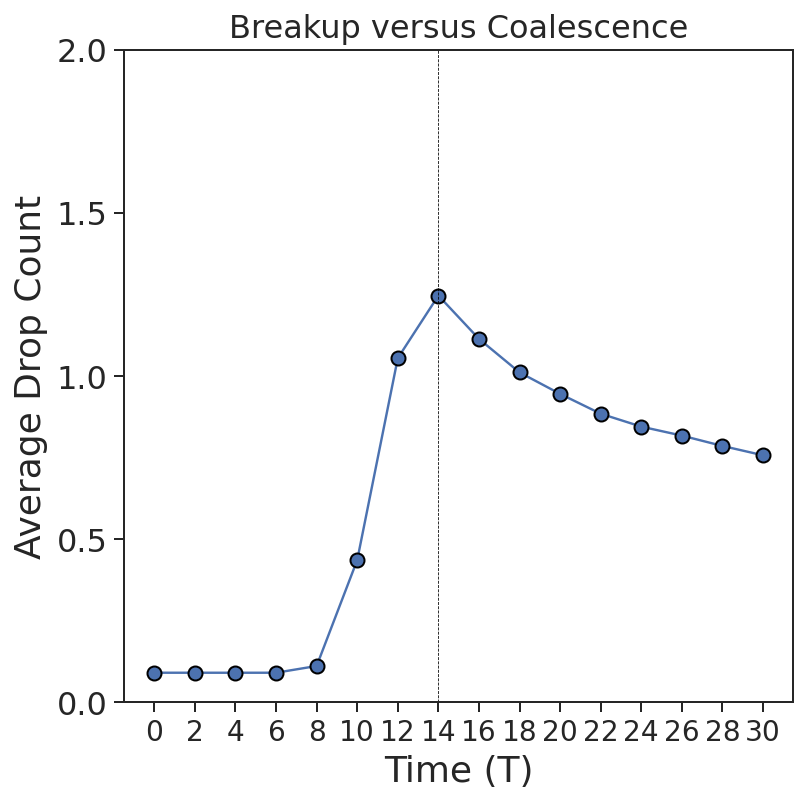

In [34]:
%matplotlib inline

rp_units = (ndrops.loc[0,"drops"] * 0.7 * 50.0)/np.pi
#print(rp_units)
plt.figure(figsize=(6,6));
plt.plot(ndrops['time'], ndrops['drops'] / rp_units, marker = 'o', markersize = '7',
        markeredgecolor = 'black');
plt.axvline(x=14, linewidth=0.4 , color="black", linestyle='--')
plt.xticks(np.arange(0,32,step=2), fontsize=14);
plt.yticks(np.linspace(0,2,5), fontsize=16);
#plt.yscale('log');
plt.ylim(bottom = 0, top=2);
plt.ylabel("Average Drop Count", fontsize = 18);
plt.xlabel("Time (T)", fontsize=18);
plt.title("Breakup versus Coalescence", fontsize= 16);
plt.savefig("./plots_paper/breakup_vs_coal.pdf", dpi=200);

### Equivalent Diameters
Let us compute the values for the **equivalent diameters**, which can be simply estimated by equating the volume under our *discrete* wavelengths ($L_i $) to the volume of a drop with diameter $D_i$. Thus we get 

$$ \pi D_i^3 /6 = \pi R^2 L_i \implies D_i = (6 L_i R^2 )^{1/3} $$ 

The $i$ in the above equation refers to the discrete wave number, whose wavelength is given by $L_i = L/i$. We also rescale the the diameters with the intial width of the ligament $W$, thus giving us 

$$ D_i / W = \left(3\Lambda /2i \right)^{1/3} \,. $$

### Rayleigh-Plateau unstable wavelengths

Now, setting $i=1$, we get the maximum possible equivalent diameter, which is the case if the entire ligament collapsed into a single drop.
The shortest wavelength which is unstable with respect to Rayleigh-Plateau is given by 

$$ i \approx \Lambda/\pi \quad \implies D_\textrm{short}/W \approx 1.68 \,.$$ 

For the optimal (largest growth rate) wavelength of the Rayleigh-Plateau instability, we have 

$$ i \approx 0.7 \Lambda/\pi \quad \implies D_\textrm{rp}/W \approx 1.89 \,.$$ 

> $\Lambda = 50$ for `d2` dataset. 

### Key $D/W$ values
 
Therefore, we have several interesting values for the equivalent diameters as follows 
- $D_\textrm{max}/W \approx 4.21$ : Largest wavelength for the $\Lambda =50$ (entire ligament) .
- $D_\textrm{rp}/W \approx 1.89$ : Wavelength corresponding to optimal growth rate of Rayleigh-Plateau instability.
- $D_\textrm{short}/ W \approx 1.68$ : Shortest unstable wavelength for Rayleigh-Plateau instability.
- $D_\textrm{cut}/W \approx 1.14 $: Cut-off wavelengths set by low-pass filter for the $\Lambda =50$.


We also have to take into account the size of drops that form after a coalescence event. We assign the important values of $D/W$ computed above to some variables, and also define a function that computes the diameter of a drop formed due to coalescence of two drops. 

### Predictions from Driessen et al. 

We need to compute the critical aspect-ratio below which the ligament is stabilized against the Rayleigh-Plateau breakup mechanism. This is given by the solving the non-linear equation - 

$$ \frac{|\textrm{log}(\eta^\prime)|}{t_\sigma \cdot \omega_\textrm{max}} 
    + \left(6\Lambda_c \right)^{1/3} - \Lambda_c = 0 \,,$$
    
where $\eta^\prime$ is relative perturbation strength. In our case, the lower bound for this perturbation would be the initial perturbation of the original ligament ($\eta$). The other terms in the above equation are given as -

$$ t_\sigma \cdot \omega_\textrm{max} =\sqrt{1/2(K_{\textrm{max}}^2 - K_{\textrm{max}}^4) + 9/4(\textrm{Oh}^2)K_{\textrm{max}}^4} - 3/2(\textrm{Oh})K_{\textrm{max}}^2 \,,$$

where $ K_{\textrm{max}} = \left( 2 + 3\sqrt{2}(\textrm{Oh}) \right)^{-1/2} $ gives us the optimally perturbed wavelength for the visous Rayleigh-Plateau mechanism.


Let's first create some helpful functions.

In [6]:
def kmax(oh):
    import numpy as np
    return ( 2.0 + 3.0 * np.sqrt(2.0) * oh )**(-0.5)

def omega_tcap(oh):
    import numpy as np
    K = kmax(oh)
    return np.sqrt( 0.5 * (K**2.0 - K**4.0) + (9.0/4.0) * (oh)**2.0 * K**4.0 ) - (3.0/2.0) * oh * K**2.0

def asp_critical(eta, oh, guess):
    import numpy as np
    from scipy import optimize
    omega = omega_tcap(oh)
    def f(x):
        return (np.abs(np.log(eta)) / omega) + (6.0 * x)**(1.0/3.0) - x
    root = optimize.newton(f,guess)  
    return root

#### Computing critical aspect-ratio

For our case of $\textrm{Oh} = 10^{-2}$, and taking the lower bound of $\eta^\prime$ as the initial mean perturbation strength of our corrugated ligament, we obtain the critical aspect-ratio $\Lambda_c$ as 

In [7]:
lambda_critical = asp_critical(eta = 0.08, oh=1e-2 , guess = 15)
print(lambda_critical)

11.382990863315483


We can convert this into an equivalent diameter ($D/W$)

In [8]:
def d_eq(asp):
    return ((6.0/4.0) * asp)**(1.0/3.0)

print(d_eq(lambda_critical))

2.5750315159983796


## Drop size distributions

We take a look at the drop size PDF at T=14. 

#### Defining a useful function

In [9]:
def d_coalesce(rp=1, sat=0 , minus=False):
    d_rp = 1.89
    d_sat = d_rp / 3.0
    if minus:
        new_diameter = ( rp * (d_rp** 3.0) - sat * (d_sat ** 3.0) ) ** (1.0/3.0)
    else: 
        new_diameter = ( rp * (d_rp** 3.0) + sat * (d_sat ** 3.0) ) ** (1.0/3.0)
    return new_diameter

def d_coal_2(rp = 1 , ep = 0, minus=False):
    d_rp = 1.89
    d_ep = 1.5
    if minus:
        new_diameter = ( rp * (d_rp** 3.0) - ep * (d_ep ** 3.0) ) ** (1.0/3.0)
    else: 
        new_diameter = ( rp * (d_rp** 3.0) + ep * (d_ep ** 3.0) ) ** (1.0/3.0)
    return new_diameter

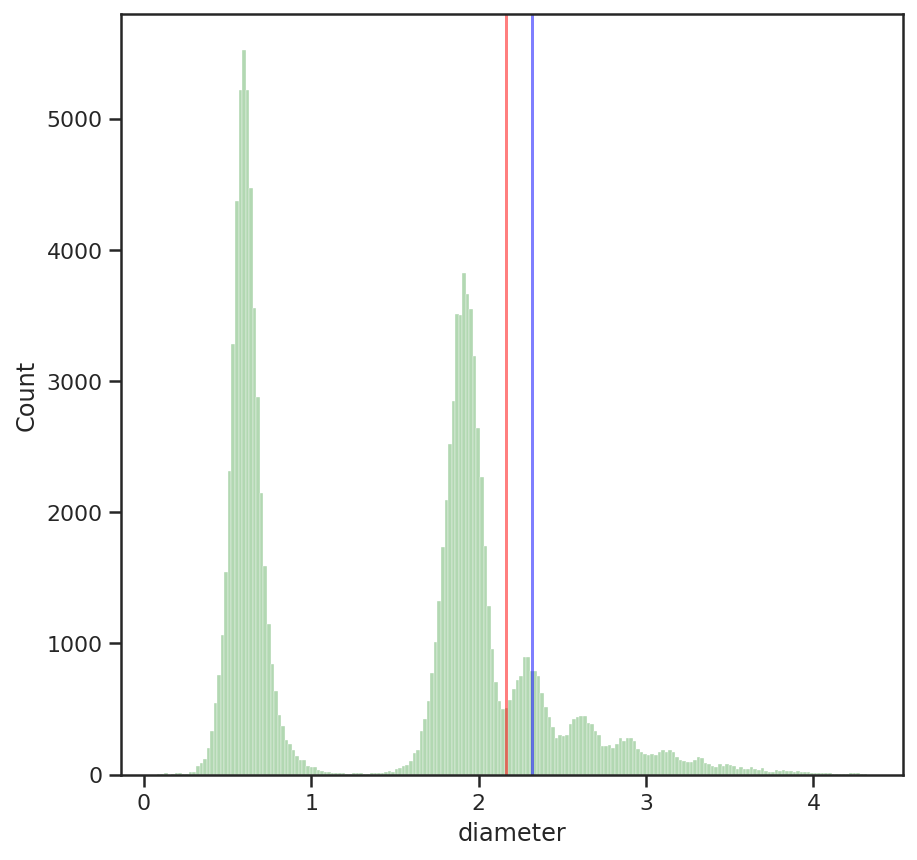

In [10]:
time_slice = 12
bins = 200

fig, ax = plt.subplots(figsize=(7,7));

ax = sns.histplot(data=data.diameter[(data.time == time_slice)].map(lambda p: p/2.0),
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins);

lim_1 = d_coalesce(rp=2 , sat=4, minus=True);
lim_2 = d_coal_2(rp=1, ep=1, minus=False);

ax.axvline(x=lim_1, alpha = 0.5, color="blue");
ax.axvline(x=lim_2, alpha = 0.5, color="red");
#ax.set_xlim(2.0,3.0);
#plt.ylim(top = 18000);

### Distribution at T= 12 : First set of breakups

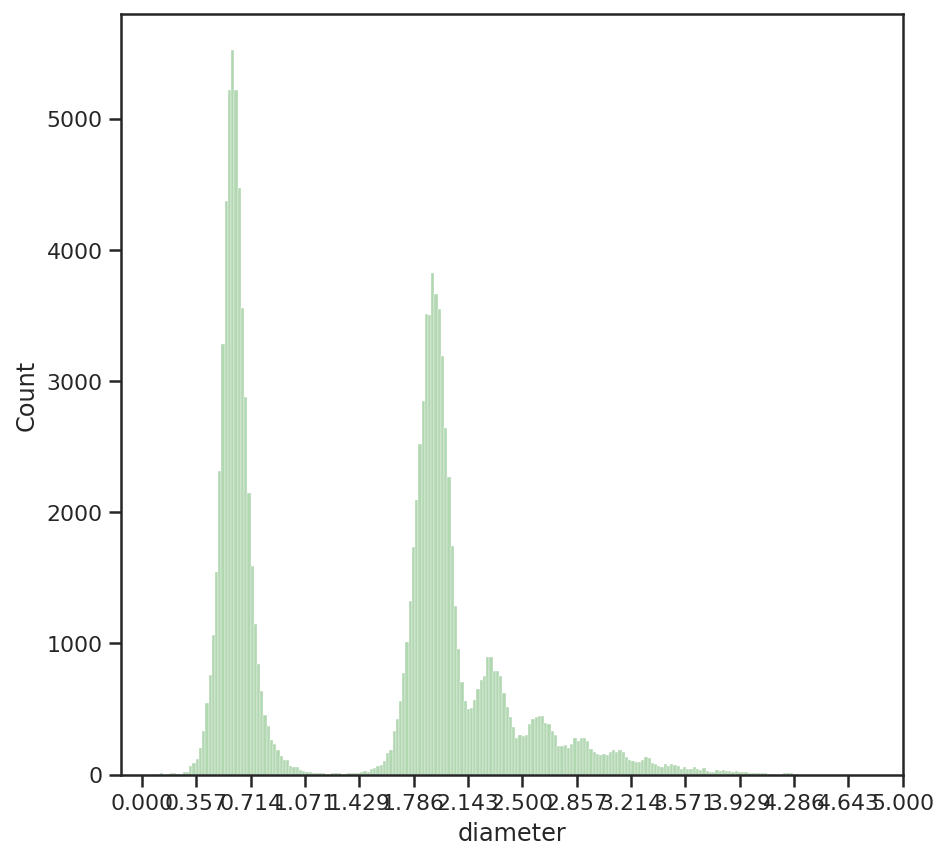

In [11]:
time_slice = 12
bins = 200

import numpy as np

fig, ax = plt.subplots(figsize=(7,7));

ax = sns.histplot(data=data.diameter[(data.time == time_slice)].map(lambda p: p/2.0),
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins);

xticks = np.linspace(0,5,15);

# ax.axvline(x=(2.62 * 1.0**(1.0/3.0)), alpha = 0.5 , c="red");
# ax.axvline(x=(3.32 * 1.0**(1.0/3.0)), alpha = 0.5 , c="red");


# ax.axvline(x=(2.3 * 1.0**(1.0/3.0)), alpha = 0.5 , c="blue");
# ax.axvline(x=(2.3 * 2.0**(1.0/3.0)), alpha = 0.5 , c="blue");
# ax.axvline(x=(2.3 * 3.0**(1.0/3.0)), alpha = 0.5 , c="blue");
ax.set_xticks(xticks);
#ax.set_yscale('log', basey=10);
#ax.set_xlim(2.0,3.0);
#plt.ylim(top = 18000);

In [12]:
for i in range(15):
    vol = (6.0*50.0) / (4.0*(i+1))
    print(i+1, vol**(1.0/3.0))

1 4.217163326508746
2 3.3471647504108475
3 2.924017738212866
4 2.6566464229565274
5 2.46621207433047
6 2.320794416806389
7 2.204555691541846
8 2.1085816632543732
9 2.0274006651911334
10 1.9574338205844317
11 1.8962235068521665
12 1.8420157493201932
13 1.7935189526747513
14 1.7497570119380041
15 1.7099759466766968


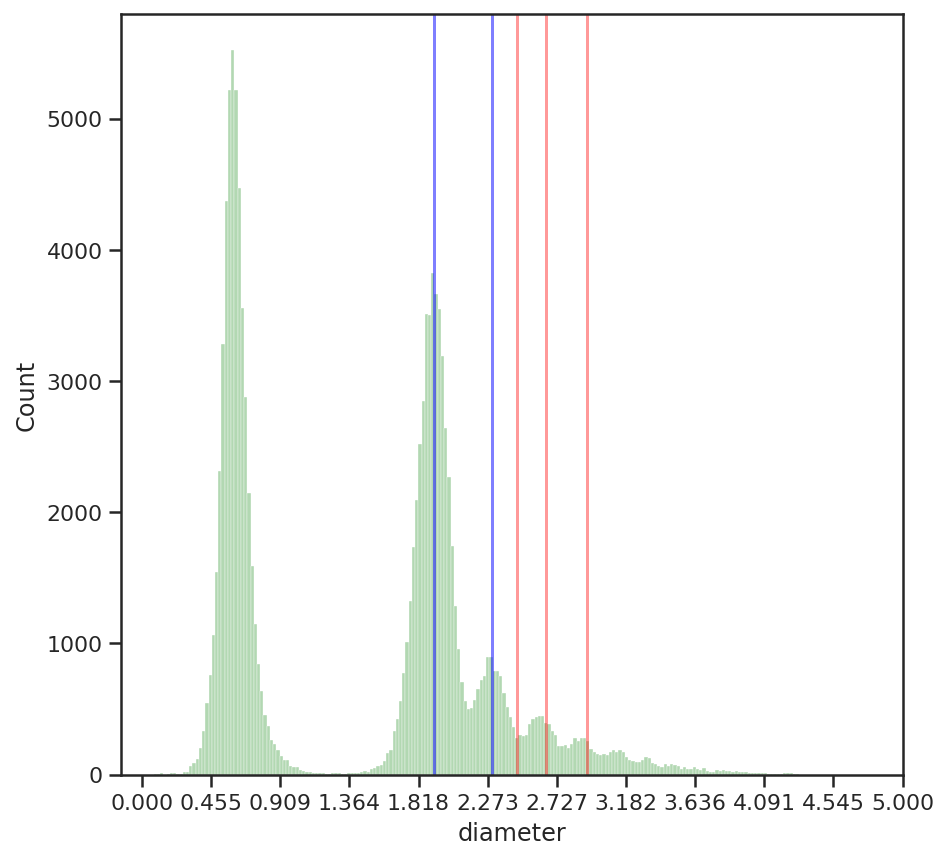

In [13]:
time_slice = 12
bins = 200

import numpy as np

fig, ax = plt.subplots(figsize=(7,7));

ax = sns.histplot(data=data.diameter[(data.time == time_slice)].map(lambda p: p/2.0),
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins);

xticks = np.linspace(0,5,12);

for i in [3,4,5]:
    vol = (6.0*50.0) / (4.0*(i))
    ax.axvline(x=vol**(1.0/3.0), alpha = 0.4 , c="red");

ax.axvline(x=(2.3 * 1.0**(1.0/3.0)), alpha = 0.5 , c="blue");
ax.axvline(x=(1.92 * 1.0**(1.0/3.0)), alpha = 0.5 , c="blue");


# ax.axvline(x=(2.3 * 2.0**(1.0/3.0)), alpha = 0.5 , c="blue");
# ax.axvline(x=(2.3 * 3.0**(1.0/3.0)), alpha = 0.5 , c="blue");


ax.set_xticks(xticks);
#ax.set_yscale('log', basey=10);
#ax.set_xlim(2.0,3.0);
#plt.ylim(top = 18000);

#### Creating some helpful functions for computing the peaks 

In [37]:
def d_eq(i):
    asp = 50
    return ((6.0*asp) / (4.0*i))**(1.0/3.0)

def growth_rate(i):
    import numpy as np
    oh = 1e-2
    lam = 50
    K = (np.pi * i)/lam
    return np.sqrt( 0.5 * (K**2.0 - K**4.0) + (9.0/4.0) * (oh)**2.0 * K**4.0 ) - (3.0/2.0) * oh * K**2.0

def norm_coeff(*args):
    
    norm = 0.0
    for arg in args:
        norm += growth_rate(arg)
    
    empty_list = []
    
    for arg in args:
        a = growth_rate(arg) / norm
        empty_list.append(a)
    
    return tuple(empty_list)

def d_sum(*args):
    import numpy as np
    
    d_list = []
    for arg in args:
        d = d_eq(arg)
        d_list.append(d)
        
    norm = 0.0
    for arg in args:
        norm += growth_rate(arg)
    
    coeff_list = []    
    for arg in args:
        a = growth_rate(arg) / norm
        coeff_list.append(a)
        
    d_np = np.array(d_list)
    coeff_np = np.array(coeff_list)
    
    return np.sum(d_np * coeff_np)    

#### Obtaining the peaks as sums of different random variables

2.3184991165344977


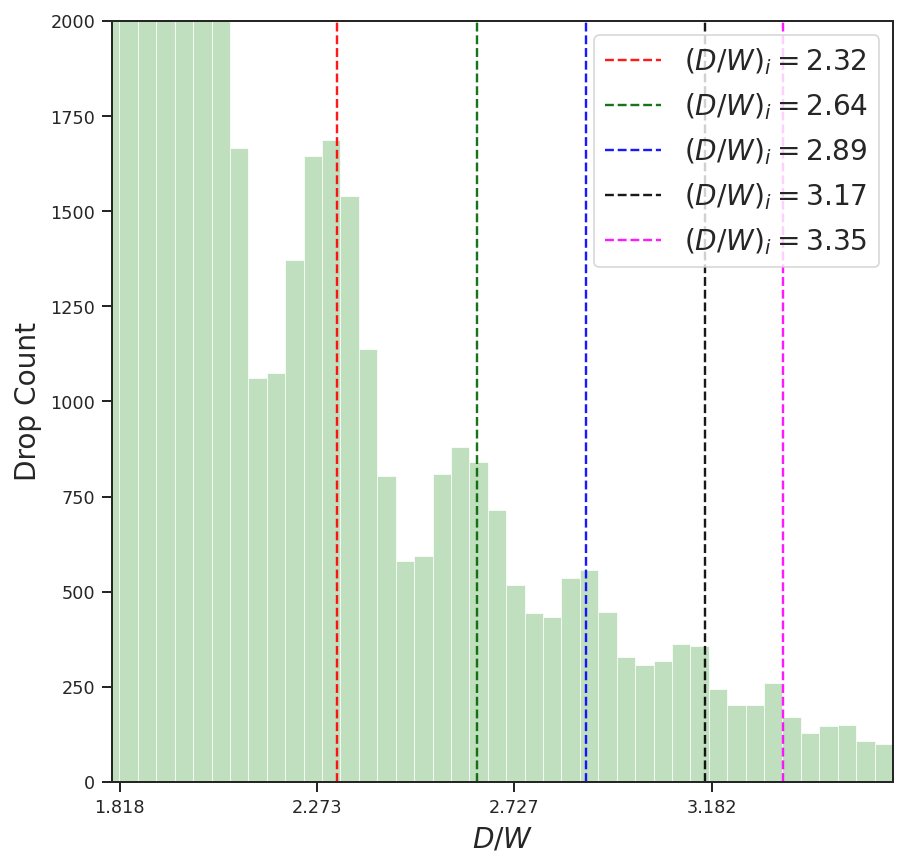

In [57]:
# 5,6,7 correspond to d = 2.3 (peak 2)
# 3,5 correspond to d = 2.62 (peak 3)
# 4,2 correspond to d = 2.89 (peak 4)
# 2,2,3 correspond to d = 3.16 (peak 5)
# 2 corresponds to d = 3.34 (peak 6)
sns.set_context("paper")
sns.set_style("ticks")
dp = d_sum(5,6,7)

print(dp)

time_slice = 12
bins = 100

import numpy as np

fig, ax = plt.subplots(figsize=(7,7));
xticks = np.linspace(0,5,12);

ax = sns.histplot(data=data.diameter[(data.time == time_slice)].map(lambda p: p/2.0),
            legend=True, palette="bright",
           alpha = 0.25 , color = 'green', bins = bins);

#c_list = ["red", "green", "blue", "orange", "magenta"]

d_list = [(d_sum(5,6,7),"red") , (d_sum(3,5),"darkgreen"), (d_sum(4,2),"blue"), (d_sum(2,2,3),"black"), (d_sum(2),"magenta")]
for el,cl in d_list:
    ax.axvline(x=el , alpha = 0.9 , c=cl, linestyle="--", label=r"$(D/W)_i = %.2f$" %el);


#ax.axvline(x=dp , alpha = 0.5 , c="blue");


ax.set_xticks(xticks);
ax.set_ylim(0,2000);
ax.set_xlim(1.8,3.6);
ax.set_xlabel(r"$D/W$", fontsize = 14);
ax.set_ylabel("Drop Count", fontsize = 14);
ax.legend(fontsize = 14);
plt.savefig("./plots_paper/peaks_t12.pdf", dpi=200);

We observe from the above plot that we can express the peaks at T=12 as a sum of random variables, where the random variables correspond to the normal distributions centered on the the discrete wavelenghts (that are part of the unstable RP spectrum). 

#### Computing variance of the different peaks 

In [16]:
from useful_functions import *
#d1 = time_slice(data, 14)

new_data = data.dropna()

time_choice = 12

d1 = new_data.loc[data["time"] == time_choice,"diameter"].to_numpy()
print("Total number of drops in this time slice is {}. ".format(len(d1)))

Total number of drops in this time slice is 117329. 


[2.73270544e+02 2.87133961e+00 1.23879471e-01]


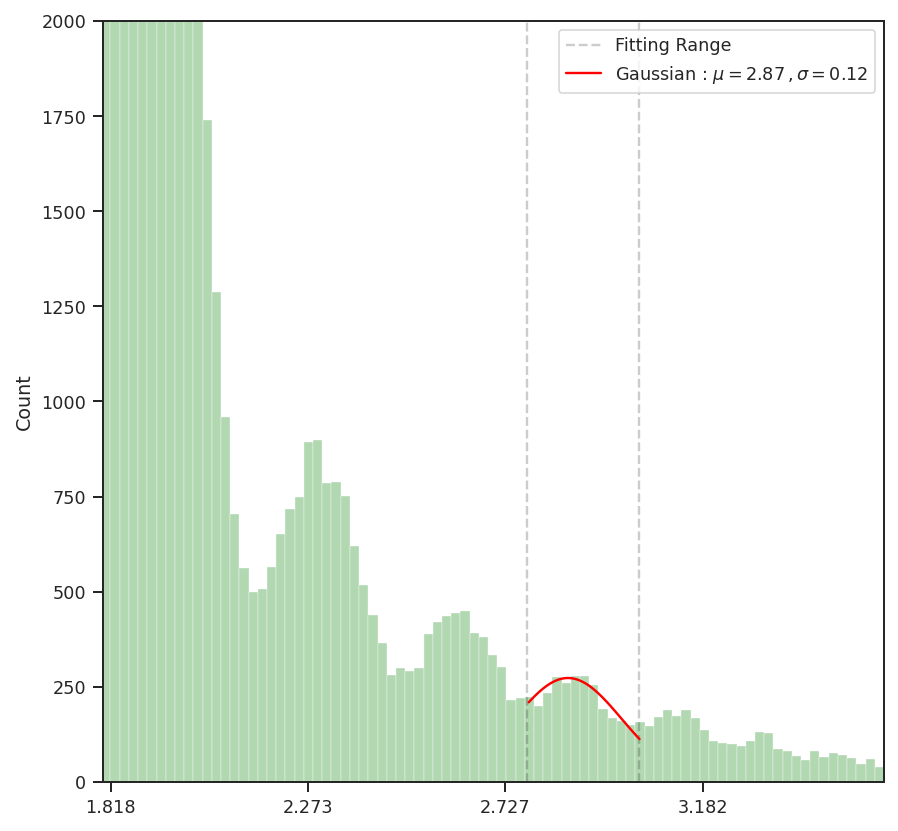

In [17]:
sns.set_context("paper")
sns.set_style("ticks")

%matplotlib inline
%autoreload 2

from useful_functions import * 

time_slice = 12
bins = 200
xspace = np.linspace(0,np.max(d1/2.0),1000)

bin_edges , bin_centers = bin_selection(d1/2.0 , bins)

heights , new_bins = np.histogram(d1/2.0 , bin_edges)

fit_x = bin_centers
fit_y = heights

# (101,86) for peak 2
# (85,73) for peak 3


limit_1 = 72
limit_2 = 60

x_lim_test_1 = np.where( xspace >= fit_x[-limit_2])
x_lim_test_2 = np.where( xspace >= fit_x[-limit_1])

x_lim_1 = x_lim_test_2[0][1]
x_lim_2 = x_lim_test_1[0][1]


fig, ax = plt.subplots(figsize=(7,7));
xticks = np.linspace(0,5,12);

ax = sns.histplot(data=d1/2.0,
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins);

ax.axvline(x = fit_x[-limit_1], color = 'black', linestyle='--', alpha = 0.2, label="Fitting Range")
ax.axvline(x = fit_x[-limit_2], color = 'black', linestyle='--', alpha = 0.2)

#ax.plot(fit_x, fit_y, c="black", linewidth =0.7);

popt_gauss , pcov_gauss = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gauss_2)
plt.plot(xspace[x_lim_1:x_lim_2], gauss_2(xspace[x_lim_1:x_lim_2], *popt_gauss), 
         label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[1], popt_gauss[2]), c='red' ); 

print(popt_gauss)


ax.set_xticks(xticks);
ax.set_ylim(0,2000);
ax.set_xlim(1.8,3.6);
ax.legend();


#How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25
# limit_1 = 35
# limit_2 = 1

# x_lim_test_1 = np.where( xspace >= fit_x[-limit_2])
# x_lim_test_2 = np.where( xspace >= fit_x[-limit_1])

# x_lim_1 = x_lim_test_2[0][1]
# x_lim_2 = x_lim_test_1[0][1]

# popt_gauss , pcov_gauss = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gauss)
# plt.plot(xspace[x_lim_1:x_lim_2], gauss(xspace[x_lim_1:x_lim_2], *popt_gauss), 
#          label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]), c='red' );

Thus, the peaks can be fit by normal distributions of the form : 
- peak 2 : $\mu = 2.29 \,, \sigma=0.12$
- peak 3 : $\mu = 2.61 \,, \sigma=0.12$
- peak 4 : $\mu = 2.87 \,, \sigma=0.12$

#### Exponential fit for the tail with the many peaks

[6.93848599 4.28269364]


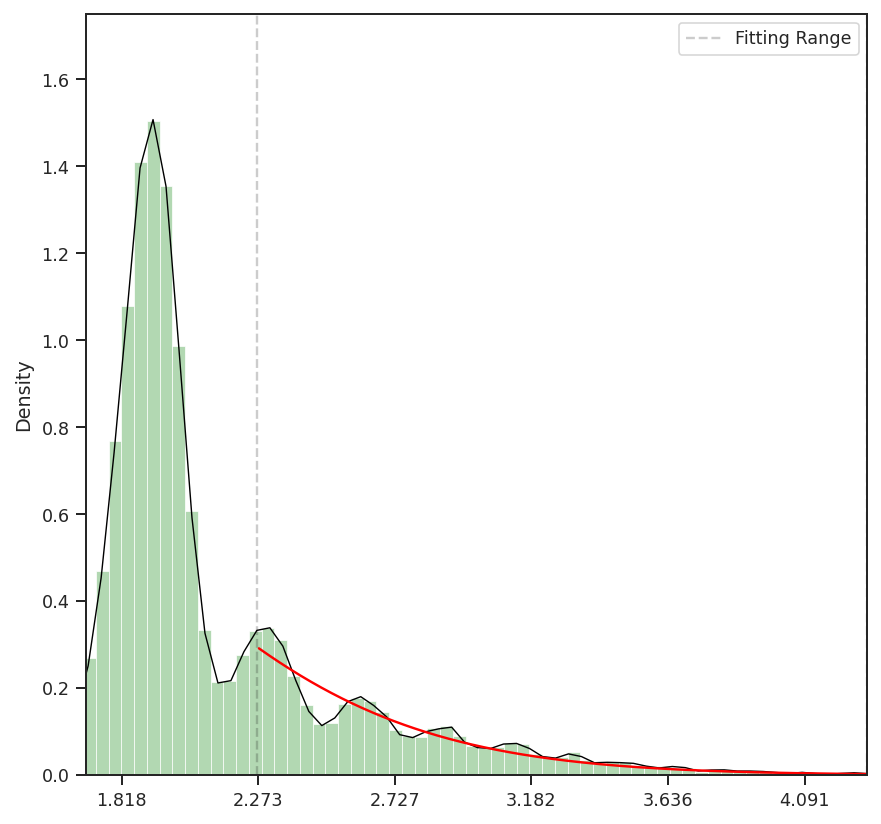

In [18]:
sns.set_context("paper")
sns.set_style("ticks")

%matplotlib inline
%autoreload 2

from useful_functions import * 

time_slice = 12
bins = 100
xspace = np.linspace(0,np.max(d1/2.0),1000)

bin_edges , bin_centers = bin_selection(d1/2.0 , bins)

heights , new_bins = np.histogram(d1/2.0 , bin_edges)

bin_width = bin_edges[1] - bin_edges[0]
area = bin_width * np.sum(heights)

fit_x = bin_centers
fit_y = heights / area

limit_1 = 48
limit_2 = 1

x_lim_test_1 = np.where( xspace >= fit_x[-limit_2])
x_lim_test_2 = np.where( xspace >= fit_x[-limit_1])

x_lim_1 = x_lim_test_2[0][1]
x_lim_2 = x_lim_test_1[0][1]


fig, ax = plt.subplots(figsize=(7,7));
xticks = np.linspace(0,5,12);

ax = sns.histplot(data=d1/2.0,
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins, stat="density");

ax.axvline(x = fit_x[-limit_1], color = 'black', linestyle='--', alpha = 0.2, label="Fitting Range")
ax.axvline(x = fit_x[-limit_2], color = 'black', linestyle='--', alpha = 0.2)

ax.plot(fit_x, fit_y, c="black", linewidth =0.7);

# popt_exp , pcov_exp = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], test_exp)
# ax.plot(xspace[x_lim_1:x_lim_2], test_exp(xspace[x_lim_1:x_lim_2], *popt_exp),  c='red' ); 

popt_exp , pcov_exp = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gamma_n)
ax.plot(xspace[x_lim_1:x_lim_2], gamma_n(xspace[x_lim_1:x_lim_2], *popt_exp),  c='red' ); 

#print(fit_x[-limit_1:-limit_2], fit_y[-limit_1:-limit_2])
print(popt_exp)

ax.set_xticks(xticks);
ax.set_ylim(0,1.75);
ax.set_xlim(1.7,4.3);
ax.legend();


#How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25
# limit_1 = 35
# limit_2 = 1

# x_lim_test_1 = np.where( xspace >= fit_x[-limit_2])
# x_lim_test_2 = np.where( xspace >= fit_x[-limit_1])

# x_lim_1 = x_lim_test_2[0][1]
# x_lim_2 = x_lim_test_1[0][1]

# popt_gauss , pcov_gauss = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gauss)
# plt.plot(xspace[x_lim_1:x_lim_2], gauss(xspace[x_lim_1:x_lim_2], *popt_gauss), 
#          label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]), c='red' );

### Comparing Poisson model vs. Gamma model

#### Defining the functions 

In [58]:
def poisson_model(x,lamb):
    import numpy as np
    k = (6.0 / 8.0)**(1.0/3.0)
    
    return 3.0 * (lamb/k) * x**2.0 * np.exp(-1.0 * (lamb/k) * x**3.0)

def gamma_model(x, n, mu):
    import numpy as np
    from scipy.special import gamma
    k = 2.0 / mu
    
    return ((k * n)**n / gamma(n)) * x**(n - 1) * np.exp(-1.0 * k * n * x)

#### Importing data from time slice

In [59]:
new_data = data.dropna()

time_choice = 12

d1 = new_data.loc[data["time"] == time_choice,"diameter"].to_numpy()
print("Total number of drops in this time slice is {}. ".format(len(d1)))

Total number of drops in this time slice is 117329. 


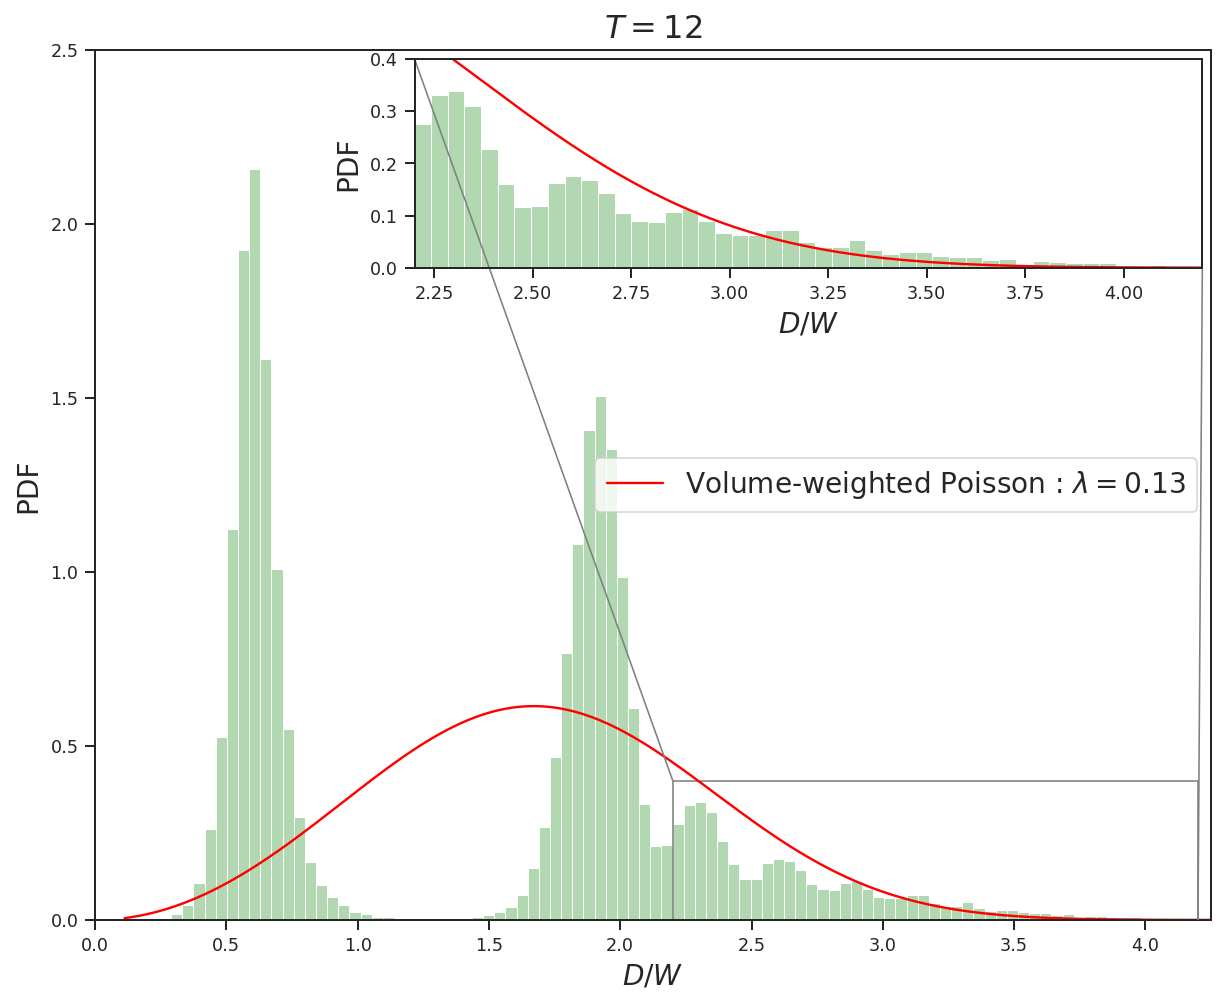

In [73]:
sns.set_context("paper")
sns.set_style("ticks")

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

%matplotlib inline
%autoreload 2

from useful_functions import * 

# computing bin-edges and heights corresponding to  
bins = 100
xspace = np.linspace(0,np.max(d1/2.0),1000)
bin_edges , bin_centers = bin_selection(d1/2.0 , bins)

# bin ranges starting from tail end
limit_1 = 98
limit_2 = 1

# figuring out limits corresponding to bin-centers
x_lim_test_1 = np.where( xspace >= bin_centers[-limit_2])
x_lim_test_2 = np.where( xspace >= bin_centers[-limit_1])

# limits for function plotting
x_lim_1 = x_lim_test_2[0][1]
x_lim_2 = x_lim_test_1[0][1]


# cropping the unscaled diameter array within the range of bins we are interested in
new_d = d1[(d1 >= 2.0 * bin_centers[-limit_1]) & (d1 <= 2.0 * bin_centers[-limit_2])]

#print(np.shape(new_d), np.min(new_d), np.max(new_d), np.mean(new_d)/2.0)

mean_new_d = np.mean(new_d)

fig, ax = plt.subplots(figsize=(10,8));
xticks = np.linspace(0,5,12);

ax = sns.histplot(data=d1/2.0,
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins, stat="density");

# ax.axvline(x = bin_centers[-limit_1], color = 'black', linestyle='--', alpha = 0.2, label="Fitting Range");
# ax.axvline(x = bin_centers[-limit_2], color = 'black', linestyle='--', alpha = 0.2);
ax.plot(xspace[x_lim_1:x_lim_2], poisson_model(xspace[x_lim_1:x_lim_2], 0.13),  c='red' , label = r"Volume-weighted Poisson : $\lambda = 0.13$");



axins = zoomed_inset_axes(ax,zoom = 1.5 ,loc="upper right");
x1, x2, y1, y2 = 2.2, 4.2, 0.0, 0.4

axins = sns.histplot(data=d1/2.0,
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins, stat="density");

axins.plot(xspace[x_lim_1:x_lim_2], poisson_model(xspace[x_lim_1:x_lim_2], 0.13),  c='red' );

axins.set_xlim(x1, x2);
axins.set_ylim(y1, y2);

axins.set_xlabel(r"$D/W$", fontsize = 14);
axins.set_ylabel("PDF", fontsize = 14);
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")


# ax.set_xticks(xticks);
ax.set_xlabel(r"$D/W$", fontsize = 14);
ax.set_ylabel("PDF", fontsize = 14);
ax.set_ylim(0,2.5);
ax.set_xlim(0,4.25);
ax.set_title(r"$T = 12$", fontsize = 16);
ax.legend(fontsize = 14, loc="center right");
#ax.set_xlim(1.7,4.3);
# ax.legend();
plt.savefig("./plots_paper/poisson_t12.pdf", dpi=200);

#### Checking out temporal variation of Poisson fit

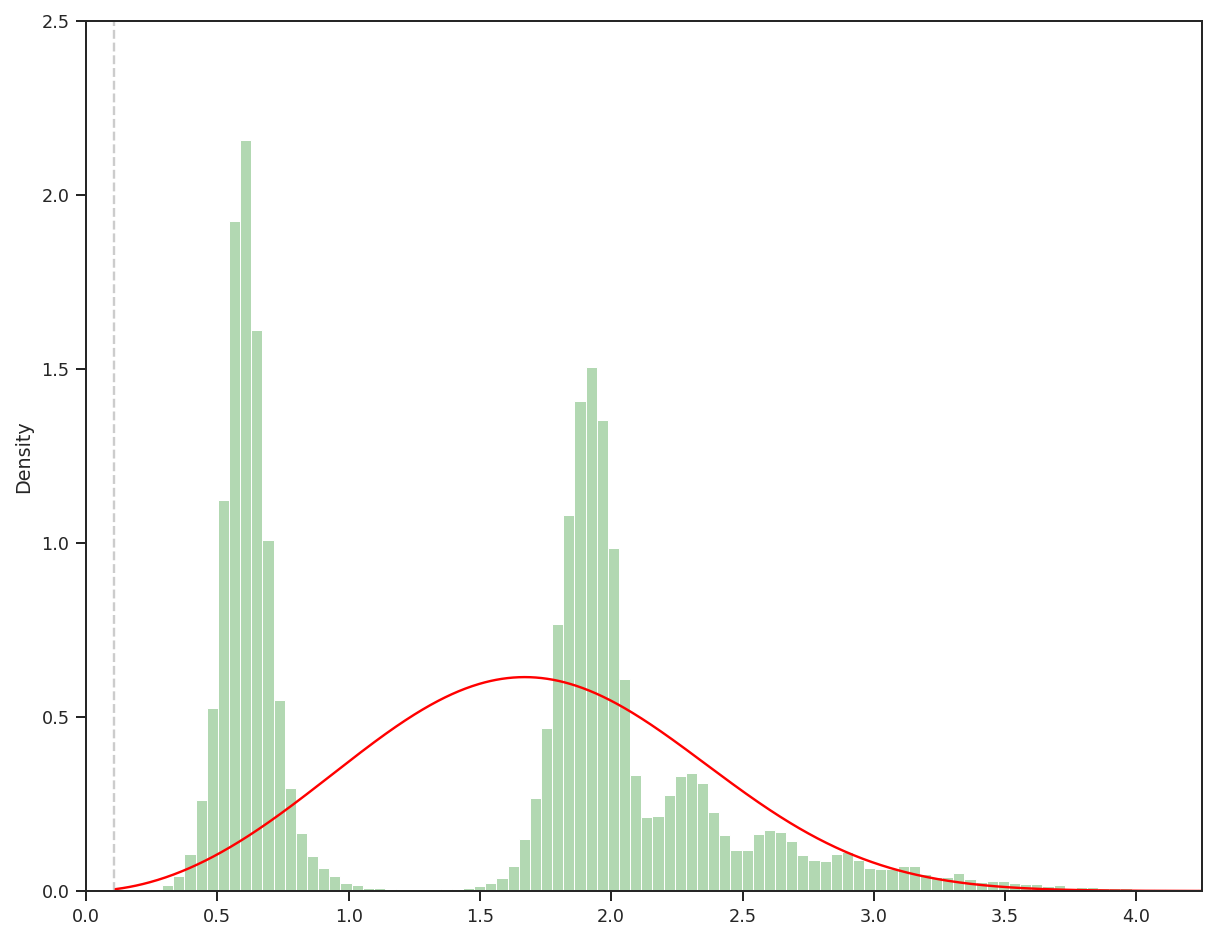

In [22]:
time_choice = 12

tmp = data.dropna()
d1 = tmp.loc[tmp["time"] == time_choice,"diameter"].to_numpy()


sns.set_context("paper")
sns.set_style("ticks")

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

%matplotlib inline
%autoreload 2

from useful_functions import * 

# computing bin-edges and heights corresponding to  
bins = 100
xspace = np.linspace(0,np.max(d1/2.0),1000)
bin_edges , bin_centers = bin_selection(d1/2.0 , bins)

# bin ranges starting from tail end
limit_1 = 98
limit_2 = 1

# figuring out limits corresponding to bin-centers
x_lim_test_1 = np.where( xspace >= bin_centers[-limit_2])
x_lim_test_2 = np.where( xspace >= bin_centers[-limit_1])

# limits for function plotting
x_lim_1 = x_lim_test_2[0][1]
x_lim_2 = x_lim_test_1[0][1]


fig, ax = plt.subplots(figsize=(10,8));
xticks = np.linspace(0,5,12);

ax = sns.histplot(data=d1/2.0,
            legend=True, palette="bright",
           alpha = 0.3 , color = 'green', bins = bins, stat="density");

ax.axvline(x = bin_centers[-limit_1], color = 'black', linestyle='--', alpha = 0.2, label="Fitting Range");
ax.axvline(x = bin_centers[-limit_2], color = 'black', linestyle='--', alpha = 0.2);
ax.plot(xspace[x_lim_1:x_lim_2], poisson_model(xspace[x_lim_1:x_lim_2], 0.13),  c='red' );



# axins = zoomed_inset_axes(ax,zoom = 1.5 ,loc="upper right");
# x1, x2, y1, y2 = 2.2, 4.5, 0.0, 0.4

# axins = sns.histplot(data=d1/2.0,
#             legend=True, palette="bright",
#            alpha = 0.3 , color = 'green', bins = bins, stat="density");

# axins.plot(xspace[x_lim_1:x_lim_2], poisson_model(xspace[x_lim_1:x_lim_2], 0.13),  c='red' );

# axins.set_xlim(x1, x2);
# axins.set_ylim(y1, y2);

# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")


# ax.set_xticks(xticks);
ax.set_ylim(0,2.5);
ax.set_xlim(0,4.25);
#ax.set_xlim(1.7,4.3);
# ax.legend();

#### Distribution plot for paper

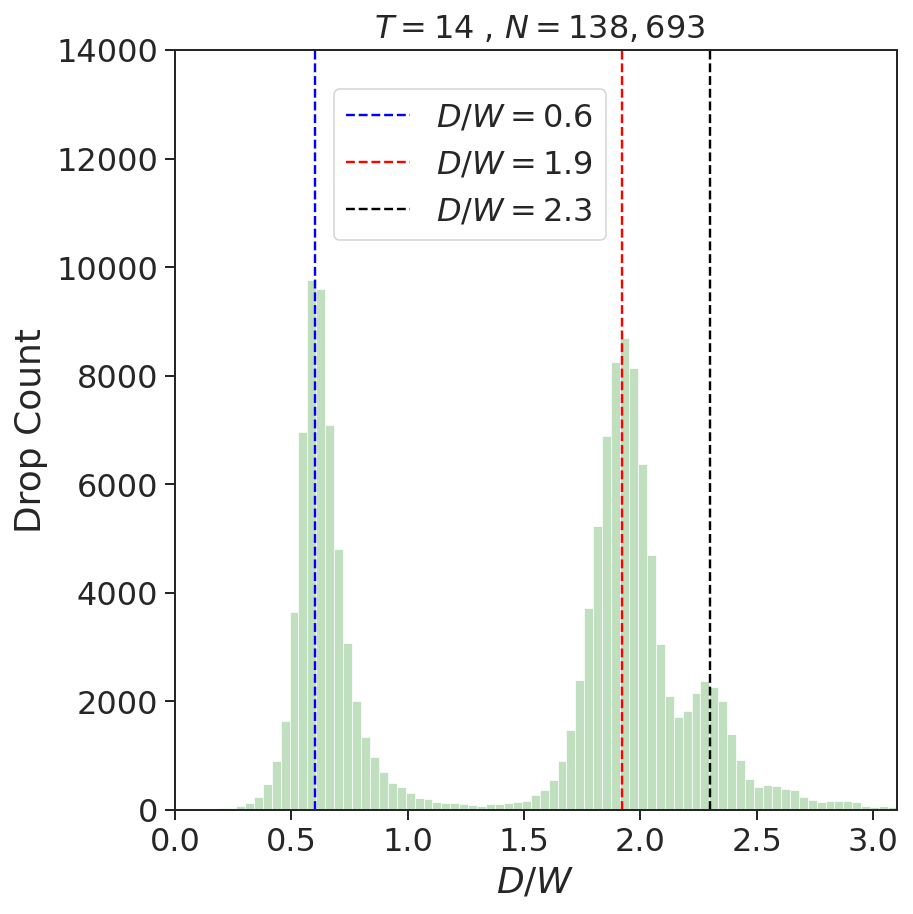

In [23]:
#from IPython.display import Image, display
#display(Image(filename="../d3/img-snapshot-14.png"))


#list_of_images = ["../d1/img-snapshot-16.png",
#                    "../d1/img-snapshot-18.png",
#                    "../d1/img-snapshot-20.png",
#                    "../d1/img-snapshot-22.png"]
#for dummy in list_of_images:
#    display(Image(filename=dummy))
sns.set_context("paper")
sns.set_style("ticks")

time_slice = 14
bins = 100

lim_1 = 0.6
lim_2 = 1.92
lim_3 = 2.3


a = sns.displot(data=data.diameter[(data.time == time_slice)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, height=6.0, aspect=1.0, alpha = 0.25 , color = 'green', bins = bins) ;


# satellite drop
plt.axvline(x= lim_1, color = 'blue', linestyle='--', label="$D/W = %.1f$" %lim_1, lw = 1.2);

# RP drop 
plt.axvline(x= lim_2, color = 'red', linestyle='--', label="$D/W = %.1f$" %lim_2, lw = 1.2);

# subcritical aspect-ratio elongated drop
plt.axvline(x= lim_3, color = 'black', linestyle='--', label="$D/W = %.1f$" %lim_3 , lw = 1.2);

plt.xlim(0,3.1);
plt.ylim(0,14000);

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);


plt.xlabel("$D/W$", fontsize=18);
plt.ylabel("Drop Count", fontsize=18);
plt.legend(fontsize = 16, loc=(0.22,0.75));
plt.title(" $T=14$ , $N= {:,}$ ".format(data.diameter[(data.time == time_slice)].shape[0]),
         fontsize=16);

a.despine(top=False, right=False, left=False, bottom=False);

#plt.savefig("./plots_paper/pdf_t14.pdf", dpi=200, bbox_inches='tight');


## Key points from above plot 
 - $D/W \approx 0.6$ 
 This corresponds to the satellite drops, which are roughly 0.1 times the volume of the main drops i.e 1/3 times the diameter of the main drops. 
 - $D/W \approx 1.89$ 
 This corresponds to the main drops which contain the volume under the optimally perturbed Rayleigh-Plateau wavelength.
 - $D/W \approx 2.3$
 These drops correspond to the ones that are elongated ligaments, but can't break down further as they are below the critical breakup threshold aspect-ratio.  

## Distributions versus time

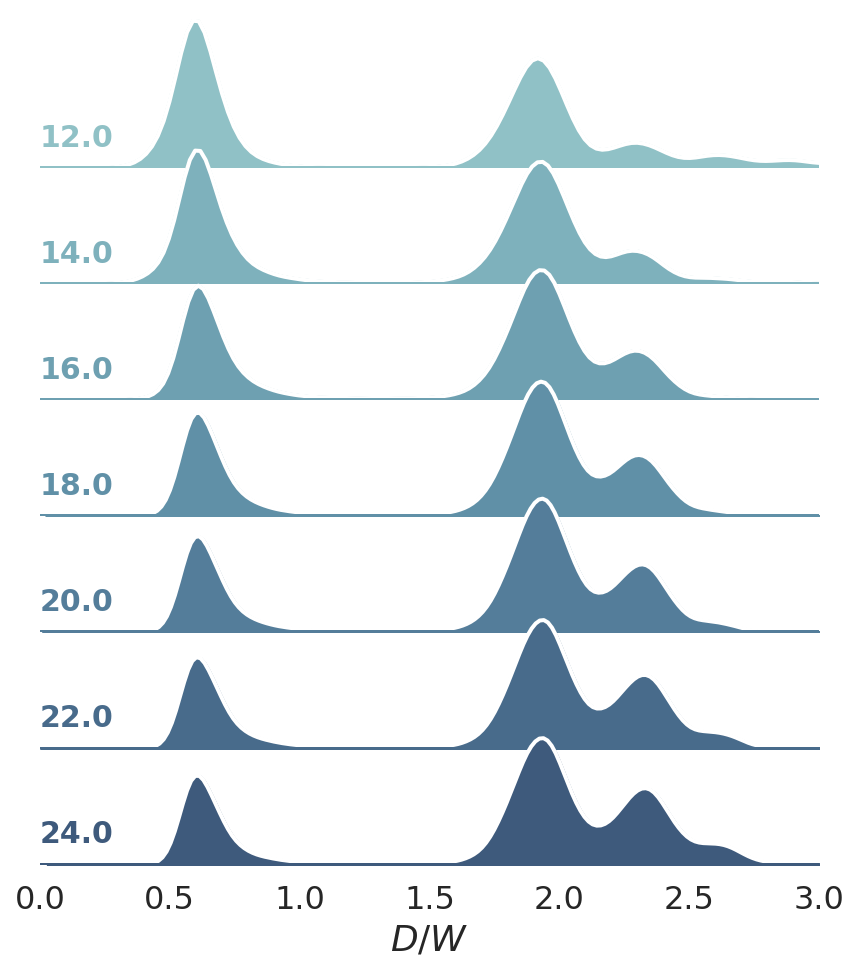

In [24]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

data_2 = data.copy()

data_2 = data_2[(data["time"] >= 12) & (data["time"] <= 24)]
data_2["diameter"] = data_2["diameter"].map(lambda p: p/2.0)


pal = sns.cubehelix_palette(10, rot=-.25, light=.7);
g = sns.FacetGrid(data_2, row="time", hue="time", aspect=6, height=1.0, palette=pal);

# Draw the densities in a few steps
g.map(sns.kdeplot, "diameter",
      bw_adjust=.5, clip_on=True,
      fill=True, alpha=1, linewidth=1.5);
g.map(sns.kdeplot, "diameter", clip_on=True, color="w", lw=2, bw_adjust=.5);
g.map(plt.axhline, y=0, lw=2, clip_on=True);


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca();
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=15);


g.map(label, "time");

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25);


# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[]);
g.set(xlim=(0.0,3.0));
plt.xlabel("$D/W$", fontsize=18);
plt.xticks(fontsize=16);
g.despine(bottom=True, left=True);
#g.fig.savefig("./plots_paper/pdf_vs_time.pdf", dpi=200);

## Nature of distribution near tail region

We take a closer look at the tail region of the histograms, for different slices of time. The steps in the analysis are 

- Error bars are computed for a fixed set of histogram bins, using a **bootstrapping** method (no assumptions about underlying distribution made !). 
- Bin heights and corresponding errors are rescaled by the total area under the histogram, in order to approximate a **PDF** . 
- A number of points starting from the end of the tail are chosen to carry out the fitting procedure. We mainly try to find a description for the *main* Rayleigh-Plateau peak.  
- Functions such as Gaussian, Log-Normal, Gamma, Poisson (volume based) and Pareto are fitted near the tail region, for the window of points chosen.


We can explore the fits based on 2 degrees of freedom, the first being the time slice chosen for the drop size distribution, the second being the number of points to fit in the window. 


### Select the time slice 
In our case, T=14 onwards are the interesting time slices. 

In [82]:
from useful_functions import *
#d1 = time_slice(data, 14)

new_data = data.dropna()

time_choice = 14

d1 = new_data.loc[data["time"] == time_choice,"diameter"].to_numpy()
print("Total number of drops in this time slice is {}. ".format(len(d1)))

Total number of drops in this time slice is 138687. 


### Computing averaged heights and corresponding error bars for histogram
We can choose different bin sizes (uniform) by varying the `global_n_bins` variable in the code below.

In [83]:
global_n_bins = 50

heights = ensemble_heights(data=d1/2.0, size_per_sample=10000, n_samples=200, n_bins= global_n_bins)

error_d1 = ensemble_error_heights(n_bootstrap=50, data=d1/2.0, size_per_sample= 10000, n_samples=200, n_bins= global_n_bins)


### Fitting in the intermediate range

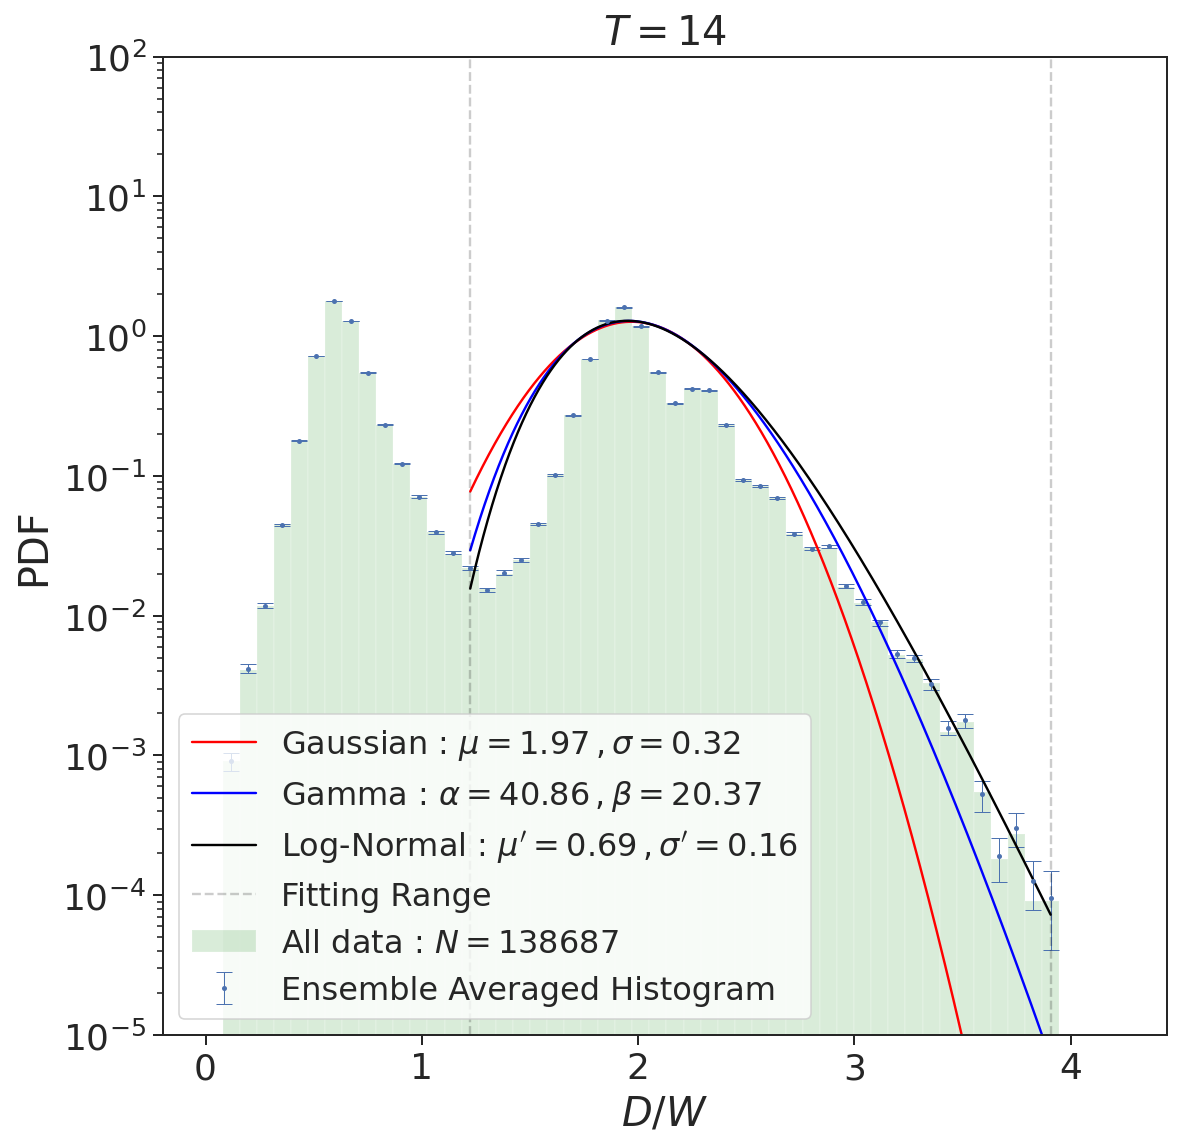

In [87]:
sns.set_context("paper")
sns.set_style("ticks")

%matplotlib inline
fig = plt.figure(figsize=(9,9))

fit_x, fit_y, xspace = plot_histogram_error(data=d1/2.0, n_bins= global_n_bins, 
                                               heights=heights, errors=error_d1);

#How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25
limit_1 = 35
limit_2 = 1

x_lim_test_1 = np.where( xspace >= fit_x[-limit_2])
x_lim_test_2 = np.where( xspace >= fit_x[-limit_1])

x_lim_1 = x_lim_test_2[0][1]
x_lim_2 = x_lim_test_1[0][1]

popt_gauss , pcov_gauss = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gauss)
plt.plot(xspace[x_lim_1:x_lim_2], gauss(xspace[x_lim_1:x_lim_2], *popt_gauss), 
         label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]), c='red' ); 

popt_gamma, pcov_gamma = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gamma_n)
plt.plot(xspace[x_lim_1:x_lim_2], gamma_n(xspace[x_lim_1:x_lim_2], *popt_gamma), 
         label=r"Gamma : $ \alpha = %.2f \, , \beta = %.2f$" %(popt_gamma[0],popt_gamma[1]), c='blue'); 

popt_lognorm, pcov_lognorm = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], lognorm)
plt.plot(xspace[x_lim_1:x_lim_2], lognorm(xspace[x_lim_1:x_lim_2], *popt_lognorm), 
         label="Log-Normal : $\mu^{\prime} = %.2f \, , \sigma^{\prime} = %.2f$" %(popt_lognorm[0], popt_lognorm[1]), c='black'); 

# popt_poisson_std, pcov_poisson_std = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], poisson_std)
# plt.plot(xspace[x_lim_1:x_lim_2], poisson_std(xspace[x_lim_1:x_lim_2], *popt_poisson_std), 
#         label="Poisson (STD) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_std[0],popt_poisson_std[1])); 

# popt_poisson_vol, pcov_poisson_vol = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], poisson_vol)
# plt.plot(xspace[x_lim_1:x_lim_2], poisson_vol(xspace[x_lim_1:x_lim_2], *popt_poisson_vol), 
#         label="Poisson (VOL) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_vol[0],popt_poisson_vol[1]),
#         color="darkgreen"); 

#popt_pareto, pcov_pareto = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], pareto)
#plt.plot(xspace[x_lim_1:x_lim_2], pareto(xspace[x_lim_1:x_lim_2], *popt_pareto), 
#         label="Pareto : $n = %.2f$" %popt_pareto[1]); 


plt.axvline(x = fit_x[-limit_1], color = 'black', linestyle='--', alpha = 0.2, label="Fitting Range")
plt.axvline(x = fit_x[-limit_2], color = 'black', linestyle='--', alpha = 0.2)

plt.hist(d1/2.0, alpha = 0.15 , color= 'green', bins=bin_selection(d1/2.0, global_n_bins)[0], density=True,
        label = "All data : $N = %d$" %(np.size(d1/2.0)));

plt.title(r"$T=14$", fontsize=20);
plt.xlim(right=np.max(d1/2.0)+0.5);
plt.ylim(top = 1e2, bottom = 1e-5);
plt.yscale('log', basey = 10);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel("$D/W$" , fontsize=20);
plt.ylabel("PDF",fontsize=20);
plt.legend(fontsize=16, loc='lower left');

plt.savefig("./plots_paper/fitting_t14.pdf", dpi = 200);


#### Trying with poisson model as well

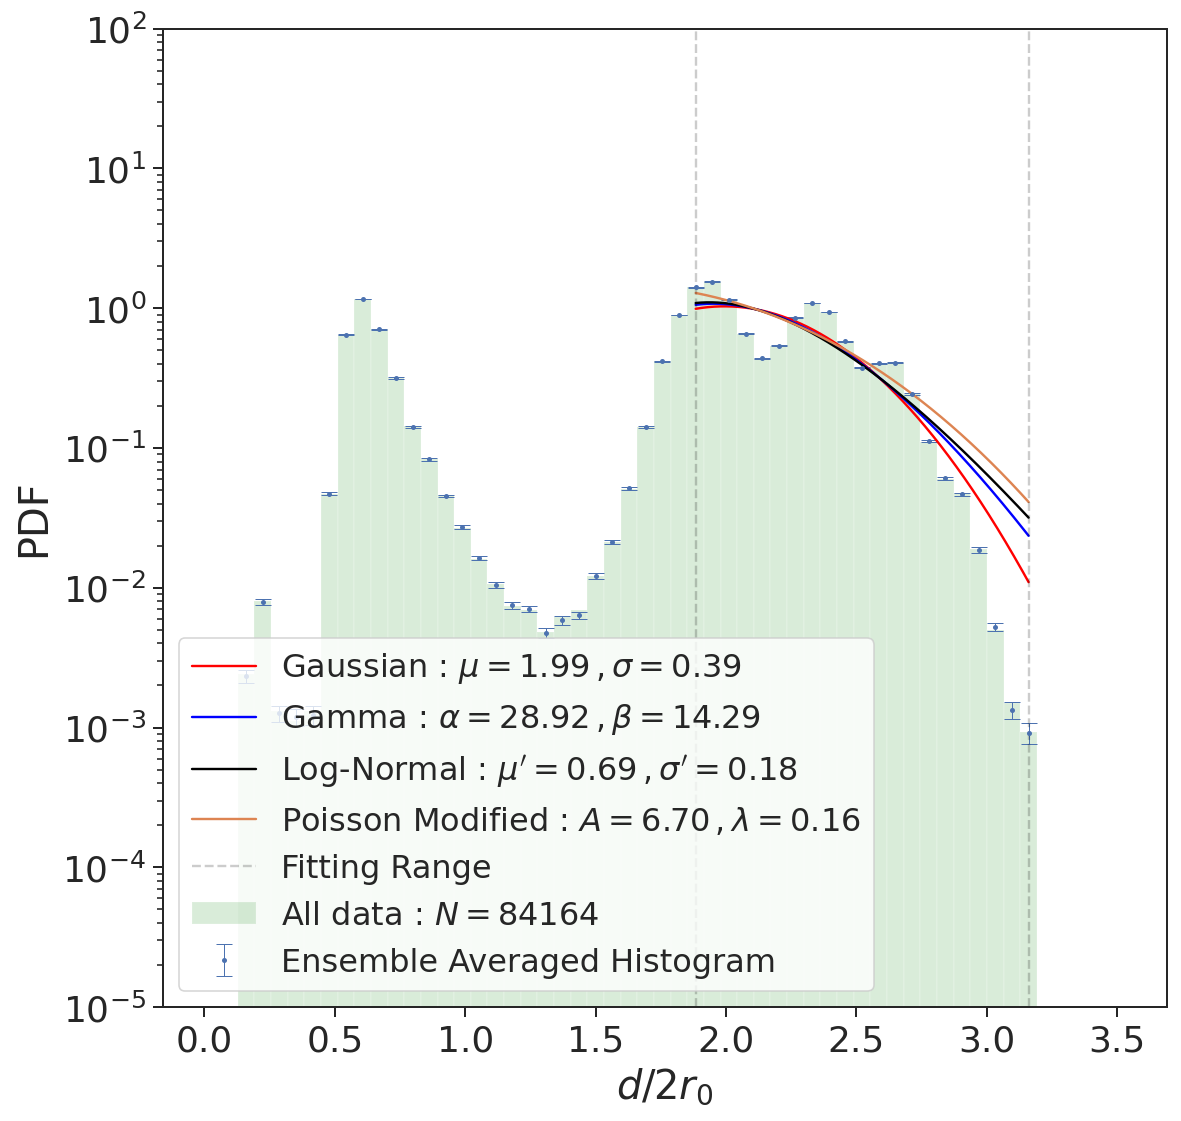

In [28]:
sns.set_context("paper")
sns.set_style("ticks")

%matplotlib inline
%autoreload 2

from useful_functions import * 

fig = plt.figure(figsize=(9,9))

fit_x, fit_y, xspace = plot_histogram_error(data=d1/2.0, n_bins= global_n_bins, 
                                               heights=heights, errors=error_d1);

#How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25
limit_1 = 21
limit_2 = 1

x_lim_test_1 = np.where( xspace >= fit_x[-limit_2])
x_lim_test_2 = np.where( xspace >= fit_x[-limit_1])

x_lim_1 = x_lim_test_2[0][1]
x_lim_2 = x_lim_test_1[0][1]

popt_gauss , pcov_gauss = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gauss)
plt.plot(xspace[x_lim_1:x_lim_2], gauss(xspace[x_lim_1:x_lim_2], *popt_gauss), 
         label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]), c='red' ); 

popt_gamma, pcov_gamma = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], gamma_n)
plt.plot(xspace[x_lim_1:x_lim_2], gamma_n(xspace[x_lim_1:x_lim_2], *popt_gamma), 
         label=r"Gamma : $ \alpha = %.2f \, , \beta = %.2f$" %(popt_gamma[0],popt_gamma[1]), c='blue'); 

popt_lognorm, pcov_lognorm = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], lognorm)
plt.plot(xspace[x_lim_1:x_lim_2], lognorm(xspace[x_lim_1:x_lim_2], *popt_lognorm), 
         label="Log-Normal : $\mu^{\prime} = %.2f \, , \sigma^{\prime} = %.2f$" %(popt_lognorm[0], popt_lognorm[1]), c='black'); 

popt_poisson_new, pcov_poisson_new = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], poisson_new)
plt.plot(xspace[x_lim_1:x_lim_2], poisson_new(xspace[x_lim_1:x_lim_2], *popt_poisson_new), 
        label="Poisson Modified : $ A = %.2f \, ,  \lambda = %.2f$" %(popt_poisson_new[0],popt_poisson_new[1])); 

# popt_poisson_vol, pcov_poisson_vol = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], poisson_vol)
# plt.plot(xspace[x_lim_1:x_lim_2], poisson_vol(xspace[x_lim_1:x_lim_2], *popt_poisson_vol), 
#         label="Poisson (VOL) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_vol[0],popt_poisson_vol[1]),
#         color="darkgreen"); 

#popt_pareto, pcov_pareto = fit(fit_x[-limit_1:-limit_2],fit_y[-limit_1:-limit_2], pareto)
#plt.plot(xspace[x_lim_1:x_lim_2], pareto(xspace[x_lim_1:x_lim_2], *popt_pareto), 
#         label="Pareto : $n = %.2f$" %popt_pareto[1]); 


plt.axvline(x = fit_x[-limit_1], color = 'black', linestyle='--', alpha = 0.2, label="Fitting Range")
plt.axvline(x = fit_x[-limit_2], color = 'black', linestyle='--', alpha = 0.2)

plt.hist(d1/2.0, alpha = 0.15 , color= 'green', bins=bin_selection(d1/2.0, global_n_bins)[0], density=True,
        label = "All data : $N = %d$" %(np.size(d1/2.0)));

#plt.title("$T=12$ , $N=50000$", fontsize=18);
plt.xlim(right=np.max(d1/2.0)+0.5);
plt.ylim(top = 1e2, bottom = 1e-5);
plt.yscale('log', basey = 10);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel("$d/2r_0$" , fontsize=20);
plt.ylabel("PDF",fontsize=20);
plt.legend(fontsize=16, loc='lower left');

#plt.savefig("./plots_sz/pdf_t12_log.pdf", dpi = 200);


### Fitting in the tail region
We can choose the number of points near the tail region for our window of fitting, using the `limit` variable in the code below.

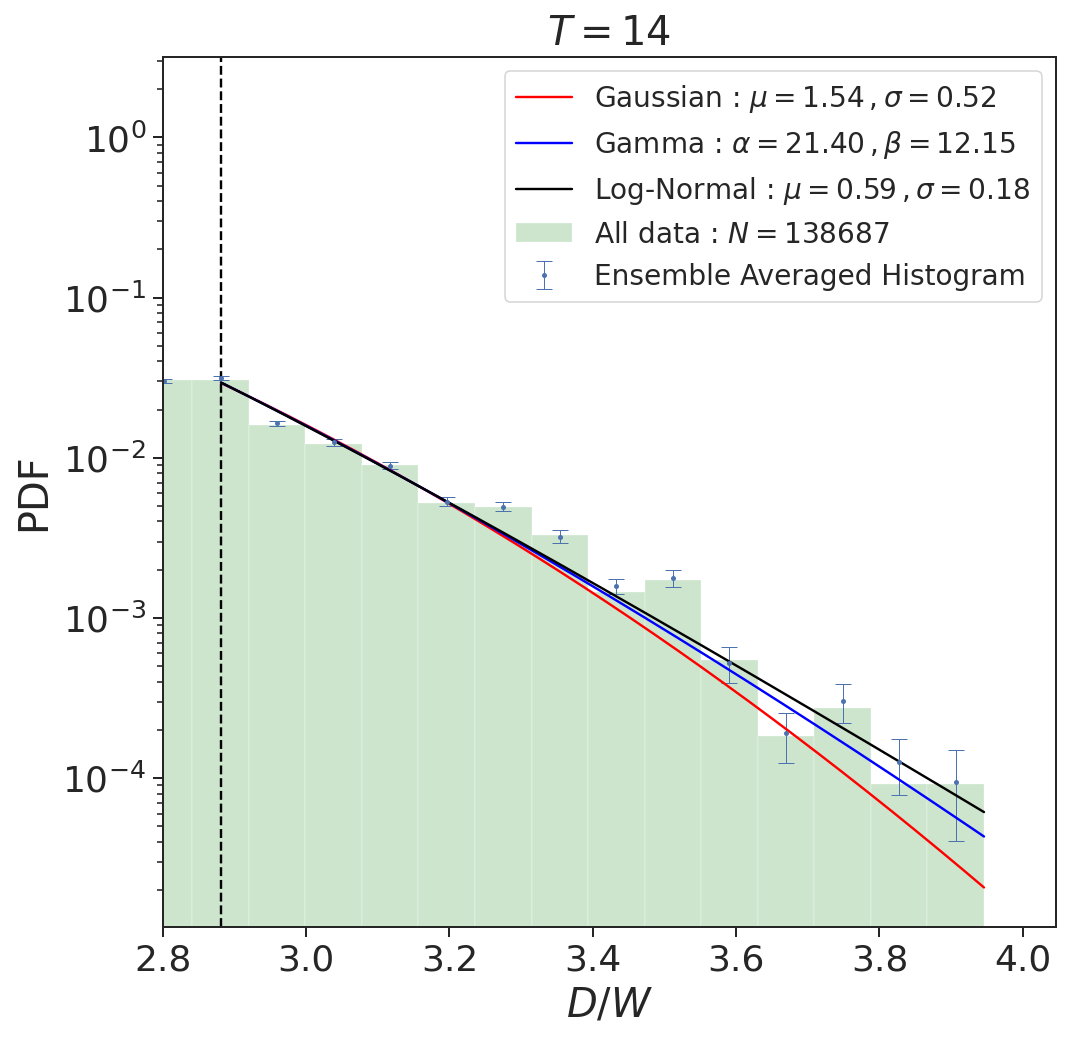

In [90]:
fig = plt.figure(figsize=(8,8))

fit_x, fit_y, xspace = plot_histogram_error(data=d1/2.0, n_bins= global_n_bins, heights=heights, errors=error_d1)

# How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25
limit = 14

x_lim_test = np.where( xspace >= fit_x[-limit] )

x_lim = x_lim_test[0][1]

popt_gauss , pcov_gauss = fit(fit_x[-limit:],fit_y[-limit:], gauss)
plt.plot(xspace[x_lim:], gauss(xspace[x_lim:], *popt_gauss), c="red" ,
         label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]) ); 

popt_gamma, pcov_gamma = fit(fit_x[-limit:], fit_y[-limit:], gamma_n)
plt.plot(xspace[x_lim:], gamma_n(xspace[x_lim:], *popt_gamma), c="blue",
         label=r"Gamma : $ \alpha = %.2f \,, \beta = %.2f$" %(popt_gamma[0],popt_gamma[1])); 

popt_lognorm, pcov_lognorm = fit(fit_x[-limit:], fit_y[-limit:], lognorm)
plt.plot(xspace[x_lim:], lognorm(xspace[x_lim:], *popt_lognorm), c="black",
         label="Log-Normal : $\mu = %.2f \, , \sigma = %.2f$" %(popt_lognorm[0], popt_lognorm[1])); 

# popt_poisson_std, pcov_poisson_std = fit(fit_x[-limit:],fit_y[-limit:], poisson_std)
# plt.plot(xspace[x_lim:], poisson_std(xspace[x_lim:], *popt_poisson_std), 
#         label="Poisson (STD) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_std[0],popt_poisson_std[1])); 

# popt_poisson_vol, pcov_poisson_vol = fit(fit_x[-limit:],fit_y[-limit], poisson_vol)
# plt.plot(xspace[x_lim:], poisson_vol(xspace[x_lim:], *popt_poisson_vol), 
#         label="Poisson (VOL) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_vol[0],popt_poisson_vol[1])); 



#popt_poisson, pcov_poisson = fit(fit_x[-limit:], fit_y[-limit:], poisson)
#plt.plot(xspace[x_lim:], poisson(xspace[x_lim:], *popt_poisson), label="Poisson : $\lambda = %.2f$" %popt_poisson[0]); 

# popt_poisson_2, pcov_poisson_2 = fit(fit_x[-limit:], fit_y[-limit:], poisson_2)
# plt.plot(xspace[x_lim:], poisson_2(xspace[x_lim:], *popt_poisson_2), 
#          label="Poisson : $\lambda = %.2f$" %popt_poisson_2[1]); 

# popt_pareto, pcov_pareto = fit(fit_x[-limit:], fit_y[-limit:], pareto)
# plt.plot(xspace[x_lim:], pareto(xspace[x_lim:], *popt_pareto), 
#          label="Pareto : $n = %.2f$" %popt_pareto[1]); 

plt.axvline(x = fit_x[-limit], color = 'black', linestyle='--');

plt.hist(d1/2.0, alpha = 0.2, color= 'green', bins=bin_selection(d1/2.0, global_n_bins)[0], 
         density=True, label = "All data : $N = %d$" %(np.size(d1/2.0)));

# plt.ylim(top = 5e2, bottom = 1e-5);
# plt.xlim(left = 1.4)
# plt.yscale('log', basey = 10);
# plt.legend();


plt.title("$T=14$", fontsize=20);
plt.xlim(left = 2.8, right=np.max(d1/2.0) + 0.1);
#plt.ylim(top = 1e1, bottom = 1e-4);
plt.yscale('log', basey = 10);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel("$D/W$" , fontsize=20);
plt.ylabel("PDF",fontsize=20);
plt.legend(fontsize=14, loc='best');
plt.savefig("./plots_paper/fitting_z1_t14.pdf", dpi = 200);

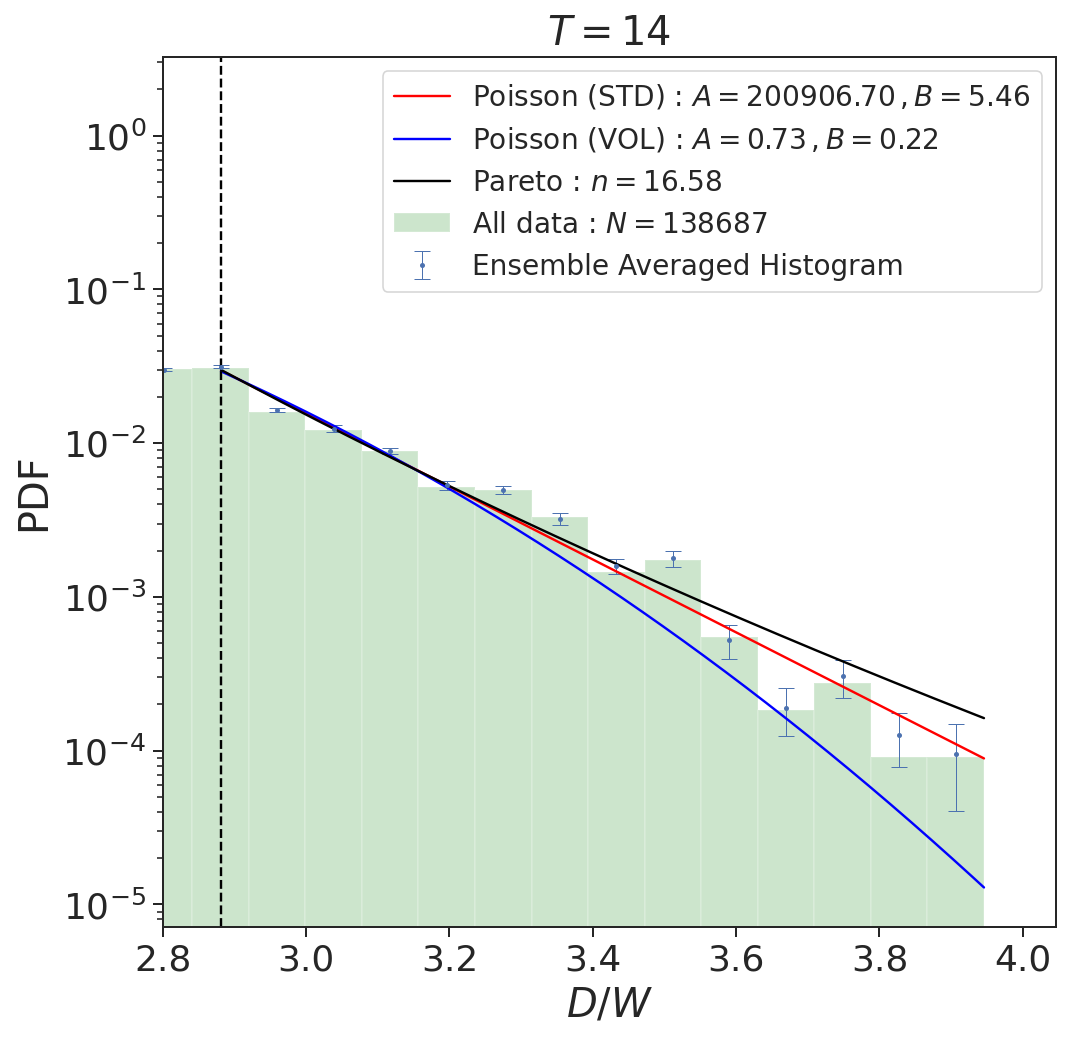

In [92]:
fig = plt.figure(figsize=(8,8))

fit_x, fit_y, xspace = plot_histogram_error(data=d1/2.0, n_bins= global_n_bins, heights=heights, errors=error_d1)

# How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25
limit = 14

x_lim_test = np.where( xspace >= fit_x[-limit] )

x_lim = x_lim_test[0][1]

# popt_gauss , pcov_gauss = fit(fit_x[-limit:],fit_y[-limit:], gauss)
# plt.plot(xspace[x_lim:], gauss(xspace[x_lim:], *popt_gauss), 
#          label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]) ); 

# popt_gamma, pcov_gamma = fit(fit_x[-limit:], fit_y[-limit:], gamma_n)
# plt.plot(xspace[x_lim:], gamma_n(xspace[x_lim:], *popt_gamma), 
#          label=r"Gamma : $ \alpha = %.2f \,, \beta = %.2f$" %(popt_gamma[0],popt_gamma[1])); 

# popt_lognorm, pcov_lognorm = fit(fit_x[-limit:], fit_y[-limit:], lognorm)
# plt.plot(xspace[x_lim:], lognorm(xspace[x_lim:], *popt_lognorm), 
#          label="Log-Normal : $\mu = %.2f \, , \sigma = %.2f$" %(popt_lognorm[0], popt_lognorm[1])); 

popt_poisson_std, pcov_poisson_std = fit(fit_x[-limit:],fit_y[-limit:], poisson_std)
plt.plot(xspace[x_lim:], poisson_std(xspace[x_lim:], *popt_poisson_std), c="red",
        label="Poisson (STD) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_std[0],popt_poisson_std[1])); 

popt_poisson_vol, pcov_poisson_vol = fit(fit_x[-limit:],fit_y[-limit:], poisson_vol)
plt.plot(xspace[x_lim:], poisson_vol(xspace[x_lim:], *popt_poisson_vol), c="blue",
        label="Poisson (VOL) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_vol[0],popt_poisson_vol[1])); 

popt_pareto, pcov_pareto = fit(fit_x[-limit:], fit_y[-limit:], pareto)
plt.plot(xspace[x_lim:], pareto(xspace[x_lim:], *popt_pareto), c="black",
         label="Pareto : $n = %.2f$" %popt_pareto[1]); 




#popt_poisson, pcov_poisson = fit(fit_x[-limit:], fit_y[-limit:], poisson)
#plt.plot(xspace[x_lim:], poisson(xspace[x_lim:], *popt_poisson), label="Poisson : $\lambda = %.2f$" %popt_poisson[0]); 

# popt_poisson_2, pcov_poisson_2 = fit(fit_x[-limit:], fit_y[-limit:], poisson_2)
# plt.plot(xspace[x_lim:], poisson_2(xspace[x_lim:], *popt_poisson_2), 
#          label="Poisson : $\lambda = %.2f$" %popt_poisson_2[1]); 



plt.axvline(x = fit_x[-limit], color = 'black', linestyle='--');

plt.hist(d1/2.0, alpha = 0.2, color= 'green', bins=bin_selection(d1/2.0, global_n_bins)[0], 
         density=True, label = "All data : $N = %d$" %(np.size(d1/2.0)));

# plt.ylim(top = 5e2, bottom = 1e-5);
# plt.xlim(left = 1.4)
# plt.yscale('log', basey = 10);
# plt.legend();


plt.title("$T=14$", fontsize=20);
plt.xlim(left = 2.8, right=np.max(d1/2.0) + 0.1);
#plt.ylim(top = 1e1, bottom = 1e-4);
plt.yscale('log', basey = 10);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel("$D/W$" , fontsize=20);
plt.ylabel("PDF",fontsize=20);
plt.legend(fontsize=14, loc='best');

plt.savefig("./plots_sz/pdf_t12_log_zoom_ppp.pdf", dpi = 200);


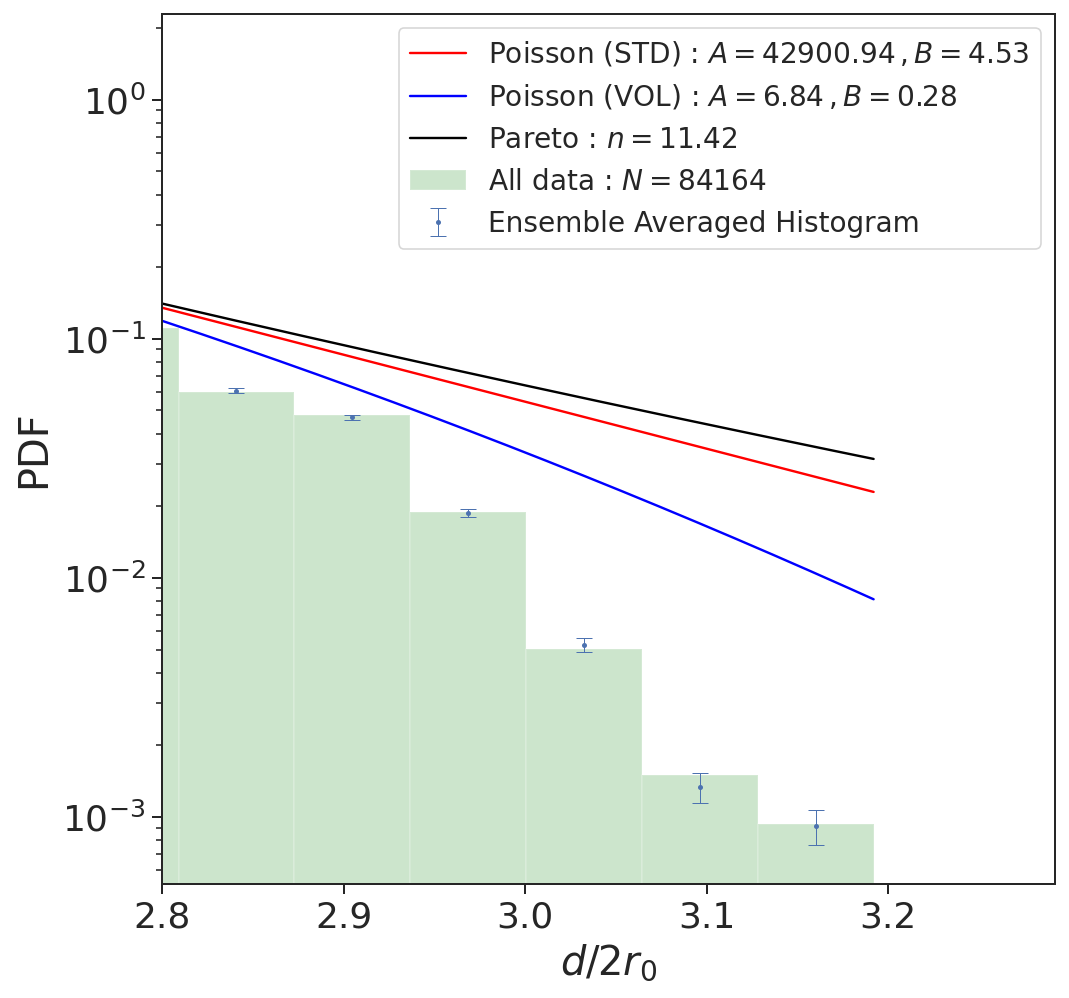

In [31]:
%autoreload 2
from useful_functions import * 

fig = plt.figure(figsize=(8,8))

fit_x, fit_y, xspace = plot_histogram_error(data=d1/2.0, n_bins= global_n_bins, heights=heights, errors=error_d1)

# How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25
limit = 14

x_lim_test = np.where( xspace >= fit_x[-limit] )

x_lim = x_lim_test[0][1]

# popt_gauss , pcov_gauss = fit(fit_x[-limit:],fit_y[-limit:], gauss)
# plt.plot(xspace[x_lim:], gauss(xspace[x_lim:], *popt_gauss), 
#          label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]) ); 

# popt_gamma, pcov_gamma = fit(fit_x[-limit:], fit_y[-limit:], gamma_n)
# plt.plot(xspace[x_lim:], gamma_n(xspace[x_lim:], *popt_gamma), 
#          label=r"Gamma : $ \alpha = %.2f \,, \beta = %.2f$" %(popt_gamma[0],popt_gamma[1])); 

# popt_lognorm, pcov_lognorm = fit(fit_x[-limit:], fit_y[-limit:], lognorm)
# plt.plot(xspace[x_lim:], lognorm(xspace[x_lim:], *popt_lognorm), 
#          label="Log-Normal : $\mu = %.2f \, , \sigma = %.2f$" %(popt_lognorm[0], popt_lognorm[1])); 

popt_poisson_std, pcov_poisson_std = fit(fit_x[-limit:],fit_y[-limit:], poisson_std)
plt.plot(xspace[x_lim:], poisson_std(xspace[x_lim:], *popt_poisson_std), c="red",
        label="Poisson (STD) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_std[0],popt_poisson_std[1])); 

popt_poisson_vol, pcov_poisson_vol = fit(fit_x[-limit:],fit_y[-limit:], poisson_vol)
plt.plot(xspace[x_lim:], poisson_vol(xspace[x_lim:], *popt_poisson_vol), c="blue",
        label="Poisson (VOL) : $ A = %.2f \, ,  B = %.2f$" %(popt_poisson_vol[0],popt_poisson_vol[1])); 

popt_pareto, pcov_pareto = fit(fit_x[-limit:], fit_y[-limit:], pareto)
plt.plot(xspace[x_lim:], pareto(xspace[x_lim:], *popt_pareto), c="black",
         label="Pareto : $n = %.2f$" %popt_pareto[1]); 

# popt_poisson_new, pcov_poisson_new = fit(fit_x[-limit:], fit_y[-limit:], poisson_new)
# plt.plot(xspace[x_lim:], poisson_new(xspace[x_lim:], *popt_poisson_new), 
#         label="Poisson Modified : $ A = %.2f \, ,  \lambda = %.2f$" %(popt_poisson_new[0],popt_poisson_new[1])); 


#popt_poisson, pcov_poisson = fit(fit_x[-limit:], fit_y[-limit:], poisson)
#plt.plot(xspace[x_lim:], poisson(xspace[x_lim:], *popt_poisson), label="Poisson : $\lambda = %.2f$" %popt_poisson[0]); 

# popt_poisson_2, pcov_poisson_2 = fit(fit_x[-limit:], fit_y[-limit:], poisson_2)
# plt.plot(xspace[x_lim:], poisson_2(xspace[x_lim:], *popt_poisson_2), 
#          label="Poisson : $\lambda = %.2f$" %popt_poisson_2[1]); 



plt.axvline(x = fit_x[-limit], color = 'black', linestyle='--');

plt.hist(d1/2.0, alpha = 0.2, color= 'green', bins=bin_selection(d1/2.0, global_n_bins)[0], 
         density=True, label = "All data : $N = %d$" %(np.size(d1/2.0)));

# plt.ylim(top = 5e2, bottom = 1e-5);
# plt.xlim(left = 1.4)
# plt.yscale('log', basey = 10);
# plt.legend();


#plt.title("$T=12$", fontsize=18);
plt.xlim(left = 2.8, right=np.max(d1/2.0) + 0.1);
#plt.ylim(top = 1e1, bottom = 1e-4);
plt.yscale('log', basey = 10);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel("$d/2r_0$" , fontsize=20);
plt.ylabel("PDF",fontsize=20);
plt.legend(fontsize=14, loc='best');

#plt.savefig("./plots_sz/pdf_t12_log_zoom_ppp.pdf", dpi = 200);


#### Can convolution of Gaussians generate an exponential tail ? 

3.797741496794083 1.5
15.29747532248847 2.4931470427577027


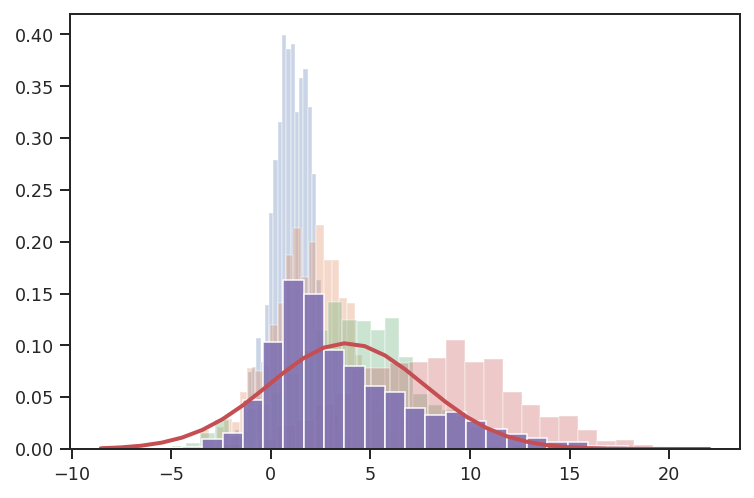

In [32]:
import numpy as np

mu_1 = 1.0
sigma_1 = 1.0

mu_2 = 2.0
sigma_2 = 2.0

mu_3 = 4.0
sigma_3 = 3.0

mu_4 = 8.0
sigma_4 = 4.0

s1 = np.random.normal(mu_1, sigma_1, 1000)
s2 = np.random.normal(mu_2, sigma_2, 1000)
s3 = np.random.normal(mu_3, sigma_3, 1000)
s4 = np.random.normal(mu_4, sigma_4, 1000)

s = np.concatenate((s1,s2,s3,s4))

mu = np.mean(s)
sigma = np.std(s)

print(np.mean(s), 0.5*(mu_1 + mu_2))
print(np.var(s) , 0.5*(np.var(s1) + np.var(s2)))

count_1, bins_1, ignored_1 = plt.hist(s1, 30, density=True, alpha = 0.3);
count_2, bins_2, ignored_2 = plt.hist(s2, 30, density=True, alpha = 0.3);
count_3, bins_3, ignored_3 = plt.hist(s3, 30, density=True, alpha = 0.3);
count_4, bins_4, ignored_4 = plt.hist(s4, 30, density=True, alpha = 0.3);

count, bins, ignored = plt.hist(s, 30, density=True, alpha = 0.9);

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r');